<a href="https://colab.research.google.com/github/vup7bv/GSS-Project/blob/main/Millie_and_Michael_Final_GSS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


For this project, our question of interest was what is the influence of age, education, and marital status upon the gender wage gap, as measured by income. This has been an area of increasing interest, and understanding the impact of these influencing factors is important for rectifying this disparity. We sourced data from the General Social Survey, and cleaned the corresponding data columns to facilitate our analysis, a process documented later in this paper. Final visualizations included a series of bar graphs and kernel density plots, coupled with statistical comparisons between the variables of interest and a baseline figure we computed to begin our analysis. To ensure thoroughness, each variable was broken down into each of its constituent categories to see where the wage gap was the most impactful. The general trend observed through the age variable was that there was less of a wage gap amongst younger professionals compared to their older age cohorts, at only 9% compared to a 16.3% baseline. Those that were either married, never married, or divorced also fared a smaller gap when compared to their separated or widowed counterparts. Finally, looking at education found the largest gap was found among the lowest levels of education, a trend that decreased as the level of education attained increased. Overall, those who are widowed, very old, or received the lowest education were found to suffer the most from the gender wage gap, with it being likely there is some overlap between the very old and widowed findings given the tendency for women to live longer than men.

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
# First, we need to take all the raw data and extract out only the variables we want to look at.
# We are interested in five total variables: sex, age, marital status, education, and income.
# This following section of the code is taken from the samples given:

var_list = ['marital', 'age', 'sex', 'degree', 'conrinc'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to

modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode

for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [62]:
# We can now read our dataframe that has only our desired variables:

df = pd.read_csv(output_filename, low_memory=False)
print(df)

             marital   age     sex                    degree  conrinc
0      never married  23.0  female                bachelor's      NaN
1            married  70.0    male     less than high school      NaN
2            married  48.0  female               high school      NaN
3            married  27.0  female                bachelor's      NaN
4            married  61.0  female               high school      NaN
...              ...   ...     ...                       ...      ...
72387  never married  22.0  female               high school      NaN
72388        married  29.0  female                  graduate  45360.0
72389  never married  32.0    male  associate/junior college  55440.0
72390        married  49.0  female                  graduate  45360.0
72391        married  50.0    male                  graduate      NaN

[72392 rows x 5 columns]


In [63]:
# We can clean our data by dropping all rows which have an "nan" in any of our chosen variables:

df = df.dropna()
header_indices = df[(df['marital'] == 'marital') | (df['degree'] == 'degree') | (df['sex'] == 'sex') | (df['age'] == 'age') | (df['conrinc'] == 'conrinc')].index
df = df.drop(header_indices)

df['conrinc'] = pd.to_numeric(df['conrinc'])
df['age'] = pd.to_numeric(df['age'])
df = df.rename(columns={'conrinc': 'individual income'})



In [64]:
# Let's examine all of the possible responses for the non-numerical variables:

possible_marital_responses = []
for item in df['marital']:
  if item not in possible_marital_responses:
    possible_marital_responses.append(item)
print(possible_marital_responses)

possible_degree_responses = []
for item in df['degree']:
  if item not in possible_degree_responses:
    possible_degree_responses.append(item)
print(possible_degree_responses)

possible_sex_responses = []
for item in df['sex']:
  if item not in possible_sex_responses:
    possible_sex_responses.append(item)
print(possible_sex_responses)

['married', 'never married', 'divorced', 'separated', 'widowed']
['high school', "bachelor's", 'graduate', 'less than high school', 'associate/junior college']
['male', 'female']


<Axes: xlabel='individual income', ylabel='Density'>

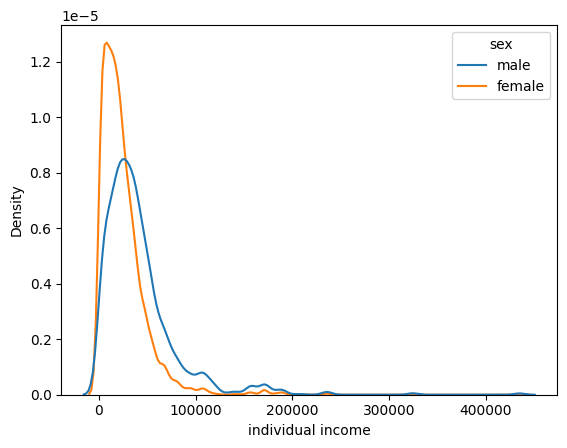

In [65]:
# First, we can see if the gender wage gap is immediately visible in a kernel density plot:
sns.kdeplot(data=df, x='individual income', hue='sex')


From this plot, it becomes clear that there is a greater proportion of females at the lower income percentile. This is a trend we can quantify in the statistics below.

In [66]:
df.loc[:,['sex','individual income']].groupby('sex').describe()

individual income                                                \
                   count          mean           std    min        25%   
sex                                                                      
female           20915.0  24873.671886  25124.486468  336.0   9343.125   
male             21121.0  41327.196374  38621.655853  336.0  18455.000   

                                         
            50%      75%            max  
sex                                      
female  19277.5  33079.0  434612.415694  
male    33079.0  51256.0  434612.415694

At first glance, it is obvious that with such high standard deviations, there is considerable variability in individual income within each group. These means initially seem rather low, so let's make a box and whiskers plot to further visualize and make sense of our data...

<Axes: xlabel='individual income', ylabel='sex'>

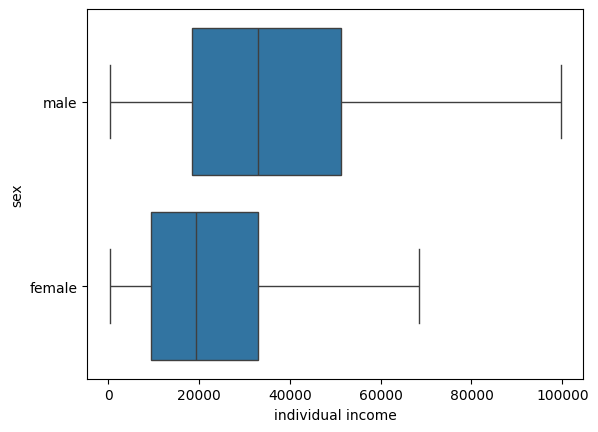

In [67]:
sns.boxplot(data=df, x='individual income', y='sex', showfliers=False) # cutting out outliers

In [68]:
print("Percent difference: " + str(round((41327.196374 - 24873.671886)/24873.671886 *100,1)) + "%")

Percent difference: 66.1%


We see that the mean income for males is higher at 41.3k dollars, with women only taking home an average of 24.9k dollars in comparison. These figures result in a percent difference of 66.1%. This baseline figure for the wage gap
will act as a point of reference as we see where this dynamic is occuring across our selected variables.

## The impact of age on the gender wage gap:
To begin, we can see if any visual trends appear when creating a scatterplot of income levels and age, with hue determined by sex:

<Axes: xlabel='individual income', ylabel='age'>

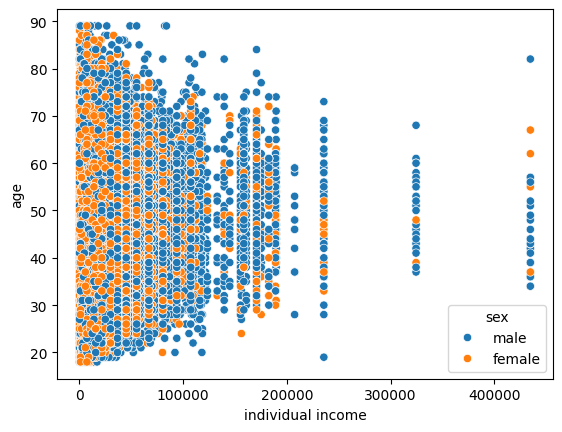

In [69]:
sns.scatterplot(data=df,x='individual income',y='age',hue='sex')

This is not particularly illuminating, so we can first try separating age into four broad groups: "young" (below 35 years old), "middle-aged" (between 35 and 50 years old), "older" (between 50 and 70 years old), and "very old" (above 70 years old). Then, we can separate our earlier kernel density plot into four separate sets of statistics regarding the differences in income for the genders (this can also be done with a more finely-grained set of age groups):

In [70]:
df_young = df.loc[(df['age'] < 35)] # This is the dataframe we'll use for the "young" age category
# If the age doesn't fit with our "young" definition, we delete that row from this new dataframe.

<Axes: xlabel='individual income', ylabel='Density'>

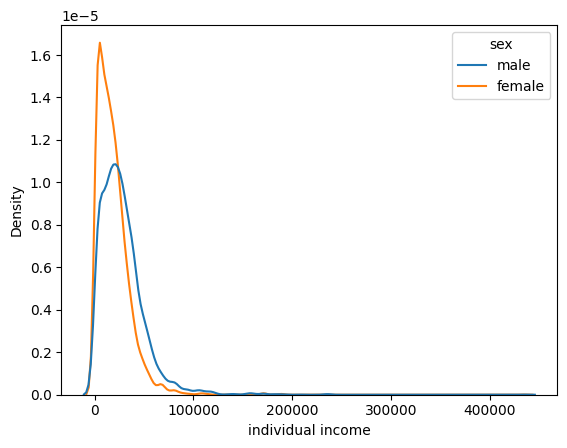

In [71]:
sns.kdeplot(data=df_young,x='individual income',hue='sex')

In [72]:
df_young.loc[:,['sex','individual income']].groupby('sex').describe()

individual income                                                       \
                   count          mean           std    min      25%      50%   
sex                                                                             
female            7701.0  18759.353609  17590.866631  336.0   6651.0  15430.0   
male              7523.0  27677.449077  22498.946403  336.0  12600.0  24155.0   

                                
            75%            max  
sex                             
female  25631.0  434612.415694  
male    36960.0  434612.415694

In [73]:
print("Percent difference: " + str(round((27677.449077 - 18759.353609)/18759.353609	*100,1)) + "%")

Percent difference: 47.5%


WRITE SOMETHING ABOUT THIS HERE, MAYBE LOTS OF PPL IN THIS AGE GROUP ARE UNEMPLOYED, STUDENTS/IN COLLEGE, STILL LOWER THAN THE BASELINE?

In [74]:
df_middleaged = df.loc[(df['age'] >= 35) & (df['age'] < 50)]
df_middleaged.loc[:,['sex','individual income']].groupby('sex').describe()

individual income                                               \
                   count          mean           std    min       25%   
sex                                                                     
female            7298.0  28514.334006  26927.465209  336.0  12008.75   
male              7367.0  48996.702467  41400.074181  336.0  25200.00   

                                         
            50%      75%            max  
sex                                      
female  22573.0  36960.0  434612.415694  
male    39695.0  59542.0  434612.415694

In [75]:
print("Percent difference: " + str(round((48996.702467 - 28514.334006)/28514.334006	*100,1)) + "%")

Percent difference: 71.8%


WRITE SOME OBSERVATION HERE, HIGHER THAN THE BASELINE


In [76]:
df_older = df.loc[(df['age'] >= 50) & (df['age'] < 70)]
df_older.loc[:,['sex','individual income']].groupby('sex').describe()

individual income                                                \
                   count          mean           std    min        25%   
sex                                                                      
female            5423.0  29356.826720  29547.267704  336.0  11419.375   
male              5615.0  50667.525185  45715.585850  336.0  22004.000   

                                         
            50%      75%            max  
sex                                      
female  22556.0  38414.0  434612.415694  
male    39695.0  63195.0  434612.415694

In [77]:
print("Percent difference: " + str(round((50667.525185 - 29356.826720)/29356.826720	*100,1)) + "%")

Percent difference: 72.6%


WRITE SOME OBSERVATION HERE, HIGHER THAN THE BASELINE

In [78]:
df_veryold = df.loc[(df['age'] >= 70)]
df_veryold.loc[:,['sex','individual income']].groupby('sex').describe()

individual income                                                       \
                   count          mean           std    min      25%      50%   
sex                                                                             
female             493.0  17175.222071  23496.625275  336.0  4694.00   9630.0   
male               616.0  31164.617239  39288.209297  336.0  7277.25  18445.0   

                                 
             75%            max  
sex                              
female  19965.00  182695.909840  
male    40108.75  434612.415694

In [79]:
print("Percent difference: " + str(round((31164.617239 - 17175.222071)/17175.222071 *100,1)) + "%")

Percent difference: 81.5%


Here we find a much higher wage gap of about 81.5%, in line with our original hypothesis that the gender wage gap rises with age; however, there are other factors to consider here: for example, people aged higher than 70 may well have grown up in a time when there were fewer opportunities for women to enter the workforce for similar pay to men, and this may be a cause of the drastically high wage gap in this case.

We can also visually see the differences in gender pay gap based on age if we show a bar graph of the incomes of males and females at several different groups of ages:

<Axes: xlabel='age group', ylabel='individual income'>

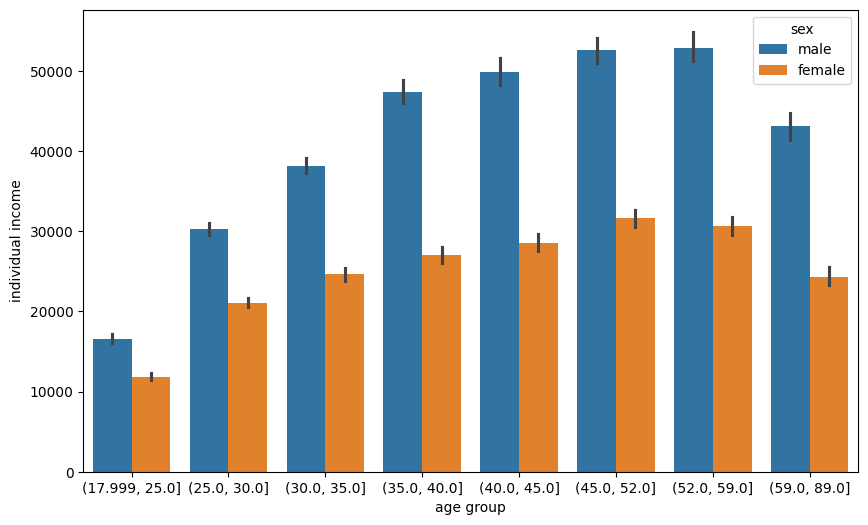

In [82]:
df['age group'] = pd.qcut(df['age'],8)
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.barplot(data=df,x='age group',y='individual income',hue='sex',ax=ax)

Here, we see that the gender wage gap does broadly rise with age
ADD ON MORE ANALYSIS HERE

## The impact of marital status on gender wage gap:
Here, since there are only a few different marital status groups, we can start by plotting a bar graph of income differences between males and females within groups of different marital statuses:

<Axes: xlabel='marital', ylabel='individual income'>

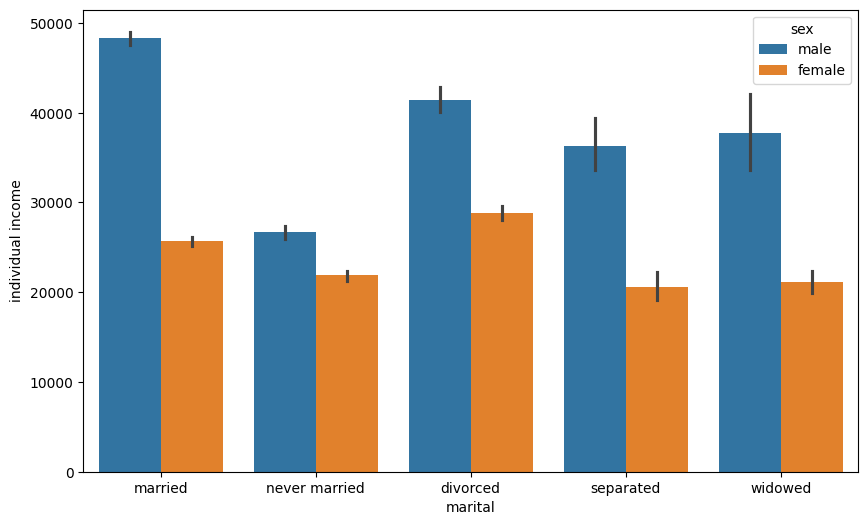

In [83]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.barplot(data=df,x='marital',y='individual income',hue='sex',ax=ax)

Intriguingly, it appears that the wage gap is smaller for those that identified as never married when compared to those that identified as any other category. We will later examine the numerical statistics, but the visualization points to unexpected trends:

In [85]:
df_married = df.loc[(df['marital'] == 'married')]
df_married.loc[:,['sex','individual income']].groupby('sex').describe()

individual income                                                       \
                   count          mean           std    min      25%      50%   
sex                                                                             
female           10094.0  25671.016944  26991.190759  336.0   9393.0  19277.5   
male             12147.0  48338.524356  41588.890579  336.0  24017.5  38414.0   

                                
            75%            max  
sex                             
female  33255.0  434612.415694  
male    58849.0  434612.415694

In [86]:
print("MARRIED\n")
print("Percent difference: " + str(round((48338.524356 - 25671.016944)/25671.016944*100,1)) + "%")
print("Baseline: 66.1%")

MARRIED

Percent difference: 88.3%
Baseline: 66.1%


In [87]:
df_nevermarried = df.loc[(df['marital'] == 'never married')]
df_nevermarried.loc[:,['sex','individual income']].groupby('sex').describe()

individual income                                                       \
                   count          mean           std    min     25%       50%   
sex                                                                             
female            5032.0  21865.940641  20990.107409  336.0  7027.0  17063.75   
male              5532.0  26683.478932  26455.882866  336.0  9892.0  20989.00   

                                
            75%            max  
sex                             
female  30240.0  235707.000000  
male    36254.0  434612.415694

In [88]:
print("NEVER MARRIED\n")
print("Percent difference: " + str(round((26683.478932 - 21865.940641)/21865.940641*100,1)) + "%")
print("Baseline: 66.1%")

NEVER MARRIED

Percent difference: 22.0%
Baseline: 66.1%


In [90]:
df_divorced = df.loc[(df['marital'] == 'divorced')]
df_divorced.loc[:,['sex','individual income']].groupby('sex').describe()

individual income                                                       \
                   count          mean           std    min      25%      50%   
sex                                                                             
female            3809.0  28785.523062  25839.080321  336.0  13572.0  23847.0   
male              2480.0  41364.095783  36782.863510  336.0  20322.5  33931.0   

                                 
             75%            max  
sex                              
female  36960.00  434612.415694  
male    50688.25  434612.415694

In [91]:
print("DIVORCED\n")
print("Percent difference: " + str(round((41364.095783 - 28785.523062)/28785.523062*100,1)) + "%")
print("Baseline: 66.1%")

DIVORCED

Percent difference: 43.7%
Baseline: 66.1%


In [92]:
df_separated = df.loc[(df['marital'] == 'separated')]
df_separated.loc[:,['sex','individual income']].groupby('sex').describe()

individual income                                               \
                   count          mean           std     min      25%   
sex                                                                     
female             857.0  20610.850444  23692.787201  336.00   8245.0   
male               571.0  36319.602775  36345.100672  415.25  15213.0   

                                         
            50%      75%            max  
sex                                      
female  16309.0  26657.0  434612.415694  
male    28217.0  44009.0  324512.292140

In [93]:
print("SEPARATED\n")
print("Percent difference: " + str(round((36319.602775 - 20610.850444)/20610.850444*100,1)) + "%")
print("Baseline: 66.1%")

SEPARATED

Percent difference: 76.2%
Baseline: 66.1%


In [94]:
df_widowed = df.loc[(df['marital'] == 'widowed')]
df_widowed.loc[:,['sex','individual income']].groupby('sex').describe()

individual income                                                       \
                   count          mean           std    min      25%      50%   
sex                                                                             
female            1123.0  21168.862856  20423.378625  336.0   7560.0  16309.0   
male               391.0  37772.897929  42794.767945  336.0  11012.5  27225.0   

                                
            75%            max  
sex                             
female  28418.0  189211.455840  
male    48332.5  434612.415694

In [95]:
print("WIDOWED\n")
print("Percent difference: " + str(round((37772.897929 - 21168.862856)/21168.862856*100,1)) + "%")
print("Baseline: 66.1%")

WIDOWED

Percent difference: 78.4%
Baseline: 66.1%


Overall, we see that the gender wage gap is significantly lower than average for individuals that have never gotten married, and even those that have gotten divorced to some extent. It is noteworthy, though, that the sample size of widowed men is significantly lower than that of widowed women (~400 compared to ~1100); we know women tend to live longer than men, so this is to be expected, but this does also hint that there may be other extenuating factors that make this group have a particularly large wage gap, including the argument posed for the "very old" group from the previous section.

ADD MORE ANALYSIS

## The impact of education on gender wage gap:
Like in the previous section, since there are relatively few groups of education levels, we can begin with a bar graph to look for any visually apparent trends:

<Axes: xlabel='degree', ylabel='individual income'>

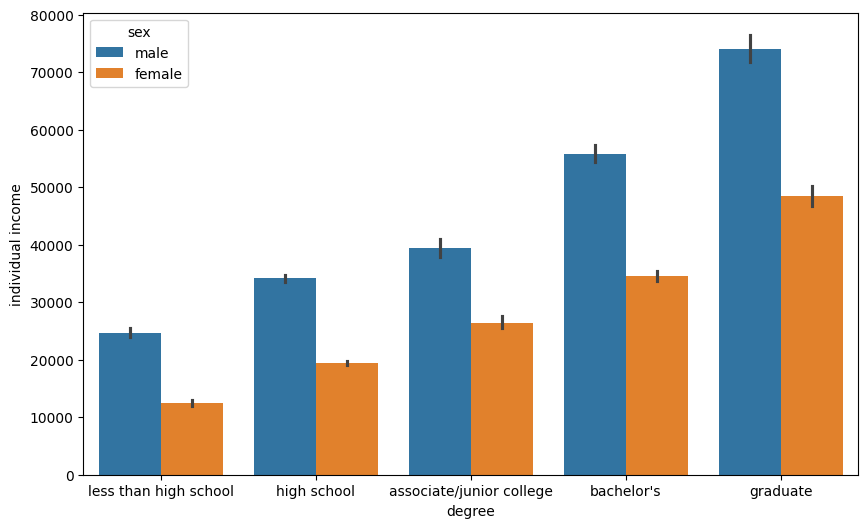

In [97]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
degree_order = ['less than high school', 'high school', 'associate/junior college', "bachelor's", 'graduate']
sns.barplot(data=df, x='degree', y='individual income', hue='sex', ax=ax, order=degree_order)

From this, it appears that the gender wage gap decreases with higher levels of education, with a potential exception for bachelors degrees. As in the previous section, we can examine the statistics for each of these groups as well, comparing wage gap percentages to our baseline level:

From this, it is clear at the very least that the wage gap remains present across each level of education, so it may be impossible to escape... but let's look closer

In [98]:
df_less = df.loc[(df['degree'] == "less than high school")]
df_less.loc[:,['sex','individual income']].groupby('sex').describe()

individual income                                                      \
                   count          mean           std    min     25%      50%   
sex                                                                            
female            2203.0  12442.148377  11626.000623  336.0  4472.0  10059.0   
male              3017.0  24679.631420  23090.332676  336.0  9932.0  20358.0   

                                
            75%            max  
sex                             
female  16902.0  189740.000000  
male    33255.0  434612.415694

In [99]:
print("LESS THAN HIGH SCHOOL\n")
print("Percent difference: " + str(round((24679.631420 - 12442.148377)/12442.148377*100,1)) + "%")
print("Baseline: 66.1%")

LESS THAN HIGH SCHOOL

Percent difference: 98.4%
Baseline: 66.1%


In [100]:
df_highschool = df.loc[(df['degree'] == 'high school')]
df_highschool.loc[:,['sex','individual income']].groupby('sex').describe()

individual income                                                      \
                   count          mean          std    min      25%      50%   
sex                                                                            
female           11128.0  19406.947071  17075.52939  336.0   8025.0  16303.0   
male             10617.0  34148.308683  28222.34702  336.0  16864.0  29424.0   

                                
            75%            max  
sex                             
female  26227.0  434612.415694  
male    44009.0  434612.415694

In [101]:
print("HIGH SCHOOL\n")
print("Percent difference: " + str(round((34148.308683 - 19406.947071)/19406.947071*100,1)) + "%")
print("Baseline: 66.1%")

HIGH SCHOOL

Percent difference: 76.0%
Baseline: 66.1%


In [102]:
df_associates = df.loc[(df['degree'] == "associate/junior college")]
df_associates.loc[:,['sex','individual income']].groupby('sex').describe()

individual income                                                       \
                   count          mean           std    min      25%      50%   
sex                                                                             
female            1675.0  26454.866615  23329.972715  336.0  12843.0  22004.0   
male              1364.0  39364.790208  30680.182533  336.0  20950.0  35106.0   

                                
            75%            max  
sex                             
female  35135.0  434612.415694  
male    49623.0  434612.415694

In [103]:
print("ASSOCIATE/JUNIOR COLLEGE\n")
print("Percent difference: " + str(round((39364.790208 - 26454.866615)/26454.866615*100,1)) + "%")
print("Baseline: 66.1%")

ASSOCIATE/JUNIOR COLLEGE

Percent difference: 48.8%
Baseline: 66.1%


In [104]:
df_bachelors = df.loc[(df['degree'] == "bachelor's")]
df_bachelors.loc[:,['sex','individual income']].groupby('sex').describe()

individual income                                                       \
                   count          mean           std    min      25%      50%   
sex                                                                             
female            3880.0  34561.396845  28667.453191  336.0  16864.0  30240.0   
male              3913.0  55841.017689  46657.923017  336.0  28107.0  45360.0   

                                
            75%            max  
sex                             
female  44165.0  324512.292140  
male    69718.0  434612.415694

In [105]:
print("BACHELOR'S\n")
print("Percent difference: " + str(round((55841.017689 - 34561.396845)/34561.396845*100,1)) + "%")
print("Baseline: 66.1%")

BACHELOR'S

Percent difference: 61.6%
Baseline: 66.1%


In [106]:
df_graduate = df.loc[(df['degree'] == "graduate")]
df_graduate.loc[:,['sex','individual income']].groupby('sex').describe()

individual income                                                       \
                   count          mean           std    min      25%      50%   
sex                                                                             
female            2029.0  48522.506790  40853.104572  336.0  25412.0  42083.0   
male              2210.0  74054.840397  56534.975016  336.0  38467.0  59542.0   

                                
            75%            max  
sex                             
female  59542.0  434612.415694  
male    94056.0  434612.415694

In [107]:
print("GRADUATE\n")
print("Percent difference: " + str(round((56534.975016 - 40853.104572)/40853.104572*100,1)) + "%")
print("Baseline: 66.1%")

GRADUATE

Percent difference: 38.4%
Baseline: 66.1%


Overall, we do see that the gender wage gap is highest for those with the lowest levels of education, and tends to decrease with increasing education with a curious exception for bachelors degrees. These four year degrees are the outlier in this trend, and they happen to be the second most popular response given.

As backed up with the data, the graphs show how the wage gap changes across different education levels. Understanding this relationship between education and the gender wage gap is crucial for developing targeted strategies to address wage disparities and promote gender equality in the workplace.


ADD MORE REASONING AND POTENTIAL CAUSES HERE

# Conclusion